# Intro to Statistics

Topics to be covered
- Measures of center
- Measures of spread
- Outliers
- Discrete Disrtribution
- Continuous Distribution
- Correlation

In [68]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import random

In [69]:
iris_data=pd.read_csv('iris.csv',names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Measures of center

- ### Mean
Mean is the average of data

In [70]:
np.mean([1,2,3,4,5,6,7,8,9])

5.0

In [71]:
np.sum(iris_data['SepalLength'])/iris_data.shape[0]

5.843333333333334

In [72]:
np.mean(iris_data['SepalLength'])

5.843333333333335

- ### Median
The median is the middle number in a data set.

In [73]:
np.median([1,2,3,4,5,6,7,8,9])

5.0

In [74]:
np.median(iris_data['SepalLength'])

5.8

- ### Mode
The mode is the most common number in a set

In [75]:
stats.mode([1,2,3,3,3,4,4,7])

3

In [76]:
stats.mode(iris_data['SepalLength'])

5.0

In [77]:
iris_data['SepalLength'].value_counts().head(1)

5.0    10
Name: SepalLength, dtype: int64

### Which measure to use

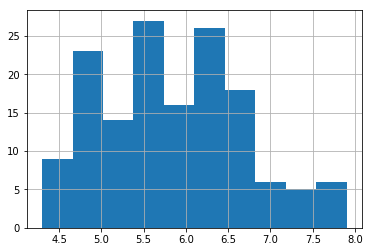

In [78]:
iris_data['SepalLength'].hist()
plt.show()

## Measures of Spread

- ### Variance
Average distance from each data pointto the data's mean
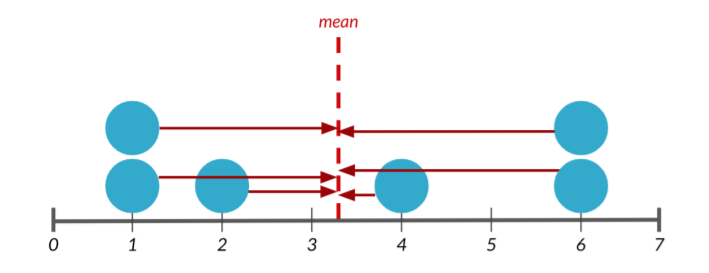

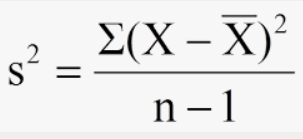

In [79]:
dists=iris_data['SepalLength']-np.mean(iris_data['SepalLength'])
sq_dists=dists**2
sum_sq_dists=np.sum(sq_dists)
variance=sum_sq_dists/(len(iris_data['SepalLength'])-1)
print(variance)

0.6856935123042507


In [80]:
np.var(iris_data['SepalLength'],ddof=1)

0.6856935123042505

- If we do not specify ddof=1 above then population varaince is calculated instead of sample variance

In [81]:
np.var(iris_data['SepalLength'])

0.6811222222222222

- ### Standard Deviation
The Standard Deviation is a measure of how spread out numbers are.
SD is square root of variance


In [82]:
np.sqrt(np.var(iris_data['SepalLength']))

0.8253012917851409

In [83]:
np.std(iris_data['SepalLength'])

0.8253012917851409

## Quantiles

In [84]:
np.quantile(iris_data['SepalLength'],0.5)

5.8

In [85]:
np.quantile(iris_data['SepalLength'],[0,0.25,0.5,0.75,1])

array([4.3, 5.1, 5.8, 6.4, 7.9])

In [86]:
np.quantile(iris_data['SepalLength'],np.linspace(0,1,5))

array([4.3, 5.1, 5.8, 6.4, 7.9])

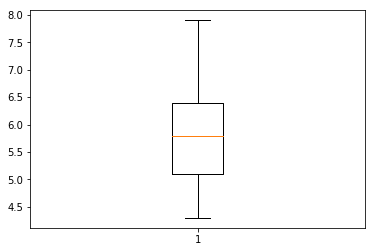

In [87]:
plt.boxplot(iris_data['SepalLength'])
plt.show()

## Outliers

In [88]:
data=[]
for i in range(0,100):
    data.append(random.randint(0,10))

(array([ 8., 15.,  9.,  8., 10.,  7.,  9.,  4., 10., 20.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

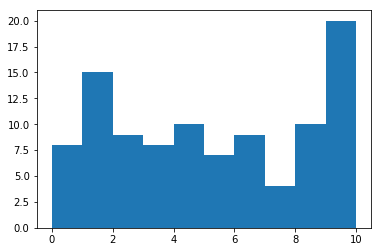

In [89]:
plt.hist(data)

### Adding an outlier

In [90]:
data.append(20)

(array([23., 17., 17., 13., 16., 14.,  0.,  0.,  0.,  1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

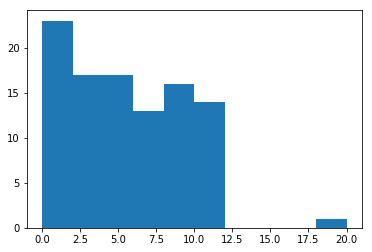

In [91]:
plt.hist(data)

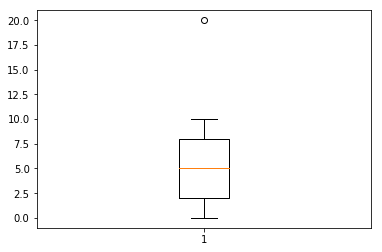

In [92]:
plt.boxplot(data)
plt.show()

### Removing Outlier

In [93]:
iqr=np.quantile(iris_data['SepalLength'],0.75)-np.quantile(iris_data['SepalLength'],0.25)
iqr

1.3000000000000007

or

In [94]:
from scipy.stats import iqr
iqr=iqr(iris_data['SepalLength'])
iqr

1.3000000000000007

In [95]:
lower_limit=np.quantile(iris_data['SepalLength'],0.25)-1.5*iqr
upper_limit=np.quantile(iris_data['SepalLength'],0.75)+1.5*iqr

In [96]:
print(lower_limit)
print(upper_limit)

3.1499999999999986
8.350000000000001


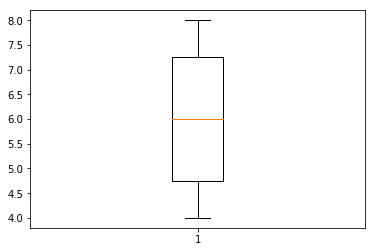

In [97]:
new_data=[]
for i in data:
    if(i>lower_limit and i<upper_limit):
        new_data.append(i)
plt.boxplot(new_data)
plt.show()

### Sampling

In [98]:
students={
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'], 
    'Age' : [23, 21, 22, 21], 
    'University' : ['BHU', 'JNU', 'DU', 'BHU'], 
}
students_df=pd.DataFrame(students)
students_df

,Name,Age,University
0,Ankit,23,BHU
1,Aishwarya,21,JNU
2,Shaurya,22,DU
3,Shivangi,21,BHU


In [99]:
students_df.sample(2)

,Name,Age,University
2,Shaurya,22,DU
1,Aishwarya,21,JNU


In [100]:
np.random.seed(10)
students_df.sample()

,Name,Age,University
2,Shaurya,22,DU


Sampling without replacement

In [101]:
students_df.sample(4)

,Name,Age,University
2,Shaurya,22,DU
1,Aishwarya,21,JNU
0,Ankit,23,BHU
3,Shivangi,21,BHU


Sampling with replacement

In [102]:
students_df.sample(4,replace=True)

,Name,Age,University
3,Shivangi,21,BHU
0,Ankit,23,BHU
1,Aishwarya,21,JNU
1,Aishwarya,21,JNU


## Sampling from discrete distributions

### Rolling of a die

In [103]:
die={
    'Number':[1,2,3,4,5,6],
    'Porb':[1/6,1/6,1/6,1/6,1/6,1/6]
}
die_df=pd.DataFrame(die)
print("Mean",np.mean(die_df['Number']))
die_df

Mean 3.5


,Number,Porb
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


### A sample of 10 rolls

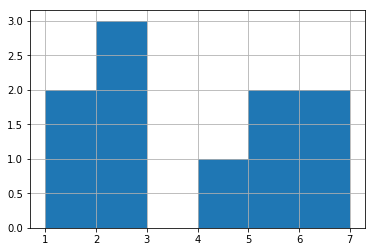

2.8


In [104]:
np.random.seed(10)
die_df['Number'].sample(10,replace=True).hist(bins=np.linspace(1,7,7))
plt.show()
print(np.mean(die_df['Number'].sample(10,replace=True)))

### A sample of 100 rolls

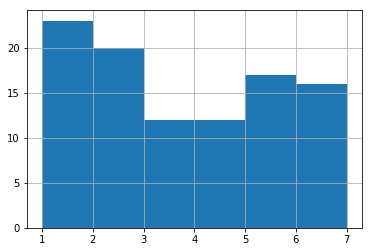

3.3


In [105]:
np.random.seed(10)
die_df['Number'].sample(100,replace=True).hist(bins=np.linspace(1,7,7))
plt.show()
print(np.mean(die_df['Number'].sample(10,replace=True)))

### A sample of 1000 rolls

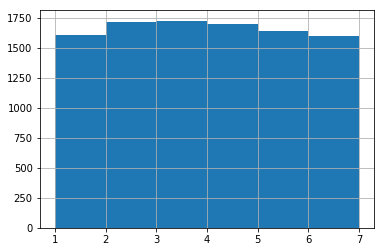

3.6


In [106]:
np.random.seed(10)
die_df['Number'].sample(10000,replace=True).hist(bins=np.linspace(1,7,7))
plt.show()
print(np.mean(die_df['Number'].sample(10,replace=True)))

## Binomial Distribution

In [107]:
from scipy.stats import binom

#### A single flip

In [108]:
#binom.rvs(num flips,prob of success, size)
binom.rvs(1,0.5,size=1)

array([1])

#### One flip many times

In [109]:
binom.rvs(1,0.5,size=8)

array([1, 1, 1, 0, 1, 1, 1, 1])

#### Many flips one time

In [110]:
binom.rvs(5,0.5,size=1)

array([4])

#### Probability of 5 heads

In [111]:
#binom.pmf(num heads,num trials, prob of heads)
binom.pmf(5,10,0.5)

0.24609375000000025

#### Probability of 5 or fewer heads

In [112]:
binom.cdf(5,10,0.5)

0.6230468749999999

## Normal Distribution

Let us assume a data set of marks fora class with mean=75 and standard deviation= 5

#### What % of students got marks less than 70?

In [113]:
from scipy.stats import norm
#norm.cdf(num,mean,stnd_dev)
norm.cdf(70,75,6)

0.20232838096364308

#### What % of students got marks greater than 85?

In [114]:
1-norm.cdf(85,75,6)

0.047790352272814696

#### What % of students got marks between 60 and 70?
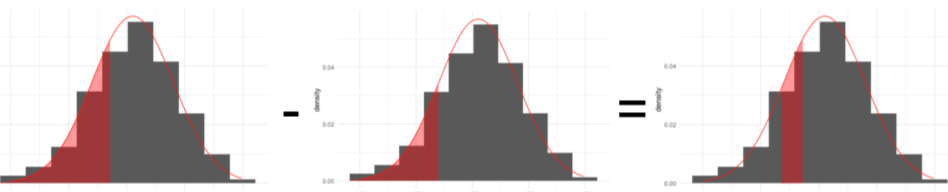

In [116]:
norm.cdf(70,75,6)-norm.cdf(60,75,6)

0.19611871563786695

#### 90% of students scored less than _____?
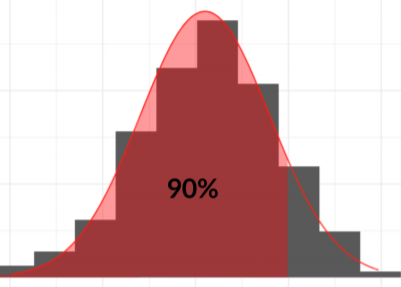

In [118]:
norm.ppf(0.9,75,6)

82.6893093932676

#### Generating random numbers

In [121]:
#norm.rvs(mean,stnd_dev,size)
norm.rvs(75,6,size=5)

array([75.02520893, 72.69771261, 69.48475892, 79.38417503, 78.60322477])

## Central Limit Theorem

### Rolling the dice 5 times

In [134]:
die=pd.Series([1,2,3,4,5,6])
print("Expected mean: ",np.mean(die))
samp_5=die.sample(5,replace=True)
print(np.mean(samp_5))

Expected mean:  3.5
2.8


### Rolling the dice 5 times 10 times

(array([2., 1., 1., 3., 0., 0., 2., 0., 0., 1.]),
 array([3.  , 3.16, 3.32, 3.48, 3.64, 3.8 , 3.96, 4.12, 4.28, 4.44, 4.6 ]),
 <a list of 10 Patch objects>)

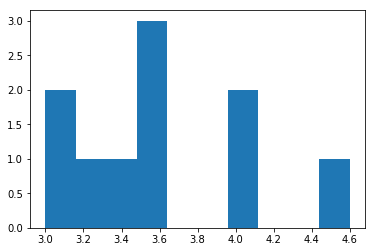

In [155]:
sample_means=[]
for i in range(10):
    samp_5=die.sample(5,replace=True)
    sample_means.append(np.mean(samp_5))
plt.hist(sample_means)

### Rolling the dice 5 times 100 times

(array([ 5.,  7., 23., 11., 11., 24.,  8.,  6.,  4.,  1.]),
 array([2.  , 2.36, 2.72, 3.08, 3.44, 3.8 , 4.16, 4.52, 4.88, 5.24, 5.6 ]),
 <a list of 10 Patch objects>)

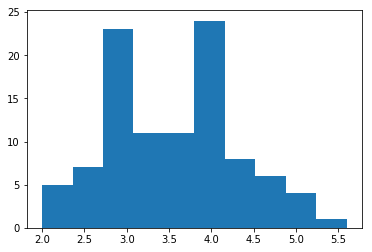

In [156]:
sample_means=[]
for i in range(100):
    samp_5=die.sample(5,replace=True)
    sample_means.append(np.mean(samp_5))
plt.hist(sample_means)

### Rolling the dice 5 times 1000 times

Mean 3.4534


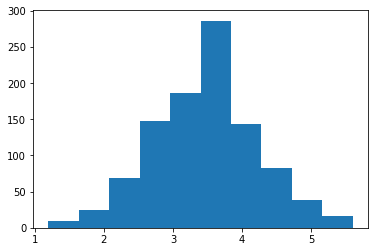

In [158]:
sample_means=[]
for i in range(1000):
    samp_5=die.sample(5,replace=True)
    sample_means.append(np.mean(samp_5))
plt.hist(sample_means)
print("Mean",np.mean(sample_means))

## Correlation

In [159]:
import seaborn as sns
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Correlation between SepalLength and PetalLength

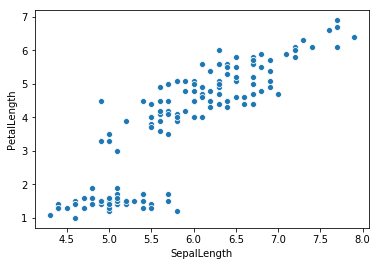

In [164]:
sns.scatterplot(x='SepalLength',y='PetalLength',data=iris_data)

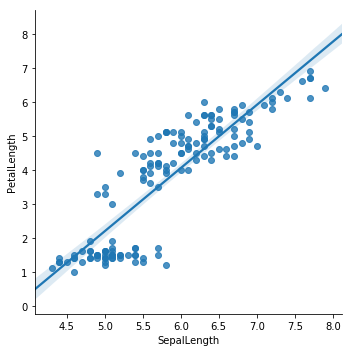

In [166]:
#trend line
sns.lmplot(x='SepalLength',y='PetalLength',data=iris_data)

In [167]:
iris_data['SepalLength'].corr(iris_data['PetalLength'])

0.8717541573048718

In [168]:
iris_data['PetalLength'].corr(iris_data['SepalLength'])

0.8717541573048718

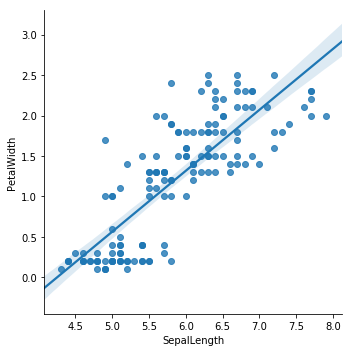

In [170]:
sns.lmplot(x='SepalLength',y='PetalWidth',data=iris_data)

### What if there is non-linear relationship?
Like
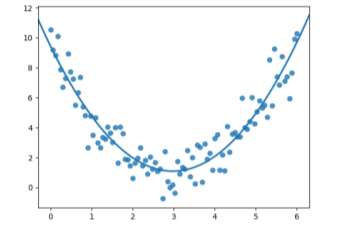

In such cases:
We can not calculate correlation as we do for linear relationship.
We have to transformation like 
- Log Transformation
- Square root transformation
- Reciprocal transformation